## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout

def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128],drp_ratio=0.3):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(input_layer)
            x=Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=n_units,activation="relu",name="hidden_layer"+str(i+1))(x)
            x=Dropout(drp_ratio)(x)
    out=keras.layers.Dense(units=output_units,activation="softmax",name="output")(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = [20,50]
BATCH_SIZE = 256
#MOMENTUM = 0.95
Dropout_EXP = [0.25,0.3]
#! Dropout_EXP>0.5
EPSILON=0.95
DECAY=0.0
BETA_1=0.9
BETA_2=0.999

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for ep,drp in zip(EPOCHS,Dropout_EXP):
    keras.backend.clear_session()
    print("experment with epochs-%s and doupout-%s" %(str(ep),str(drp)))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE,beta_1=BETA_1, beta_2=BETA_2, epsilon=EPSILON, decay=DECAY, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=ep, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-epochs-%s and doupout-%s" %(str(ep),str(drp))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

experment with epochs-20 and doupout-0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropou

Epoch 16/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.0979 - accuracy: 0.2273 - val_loss: 2.0095 - val_accuracy: 0.2910
Epoch 17/50
50000/50000 [==============================] - 17s 340us/step - loss: 2.0855 - accuracy: 0.2291 - val_loss: 1.9979 - val_accuracy: 0.2983
Epoch 18/50
50000/50000 [==============================] - 17s 344us/step - loss: 2.0726 - accuracy: 0.2367 - val_loss: 1.9869 - val_accuracy: 0.3014
Epoch 19/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.0663 - accuracy: 0.2403 - val_loss: 1.9773 - val_accuracy: 0.3052
Epoch 20/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.0562 - accuracy: 0.2409 - val_loss: 1.9681 - val_accuracy: 0.3072
Epoch 21/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.0491 - accuracy: 0.2479 - val_loss: 1.9601 - val_accuracy: 0.3112
Epoch 22/50
50000/50000 [==============================] - 18s 355us/step - loss: 2.0428 - accuracy:

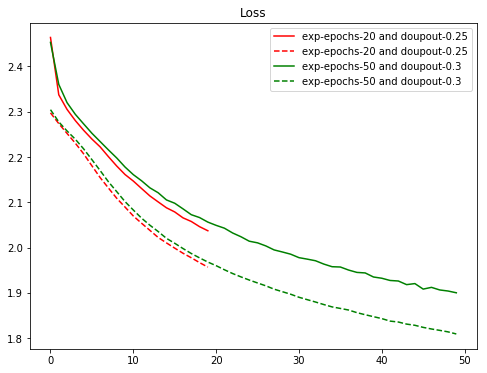

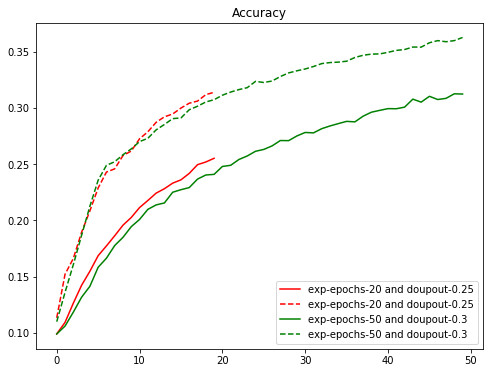

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar=["red","green","blue","yellow","grey","orange","black","pink","purple","brown"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()